# AUC and Contour plots
This notebook reads the csv file produced by `opu_output_analysis.py` for a given experiment, and produces the nvar vs nevents AUC curves for Ridge and SGD, as well as contour plots.

In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.close('all')
plt.ion()

sns.set(style='whitegrid', context='notebook',
        font_scale=1.2, rc={"lines.linewidth": 2.5,  'text.color': '0'})

## Choose the experiment results to be explored.

In [69]:
# Type considered, should be ttbar or W
collision_type = 'ttbar'
# Repository containing the results of the experiment
exp_dir = f'./results/{collision_type}_24000evts_30000f_29042021_144922/'
# The plots will be created in the experiment repository
out_path = exp_dir + f'{collision_type}_'

In [4]:
df = pd.read_csv(exp_dir + 'reworked_dfscores.txt', 
                 names=["pseudoindex", "nvar", "nsamp", "score", "time", "alpha", "fitter"])
df.drop('pseudoindex', axis=1, inplace=True)
df.head()

,nvar,nsamp,score,time,alpha,fitter
0,100,100,0.529076,0.047018,1100.694171,ridge
1,100,100,0.527636,1.472216,4.832930,SGD
2,100,158,0.558786,0.013651,1778.279410,ridge
3,100,158,0.580031,0.090721,16.237767,SGD
4,158,100,0.534212,0.009556,421.696503,ridge


In [42]:
df_sgd = df[df.fitter == 'SGD'].reset_index(drop=True)
df_ridge = df[df.fitter == 'ridge'].reset_index(drop=True)

In [52]:
df_ridge.drop([175], axis=0, inplace=True)

In [54]:
df_best = df_sgd
mask = df_ridge.score > df_sgd.score

In [56]:
df_best.score[mask] = df_ridge.score

<ipython-input-56-31aa4dc05ea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best.score[mask] = df_ridge.score


In [58]:
df_best.drop('fitter', axis=1, inplace=True)

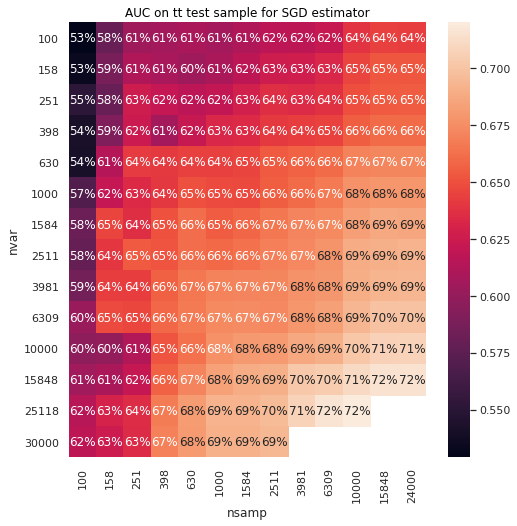

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
piv_sgd = df_sgd[['nvar', 'nsamp', 'score']].pivot('nvar', 'nsamp', 'score')
ax = sns.heatmap(piv_sgd, annot=True, fmt='.0%')
ax.set_title(f'AUC on {collision_type} test sample for SGD estimator')
fig.savefig(out_path + 'sgd_heatmap.png', format='png')

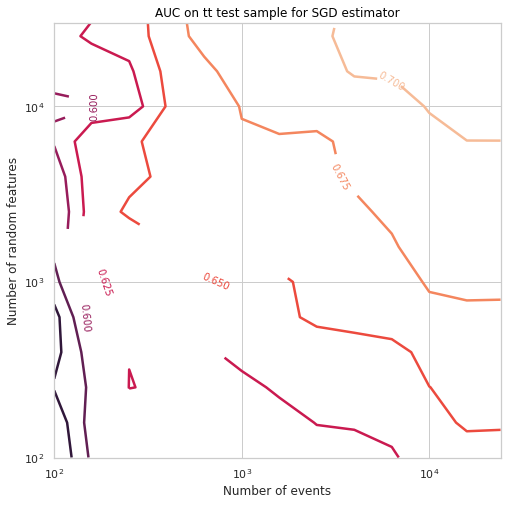

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cs = ax.contour(df_sgd.nsamp.unique(), df_sgd.nvar.unique(), piv_sgd)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_xlabel('Number of events')
ax.set_xscale('log')
ax.set_ylabel('Number of random features')
ax.set_yscale('log')
ax.set_title(f'AUC on {collision_type} test sample for SGD estimator')
fig.savefig(out_path + 'sgd_contour.png', format='png')


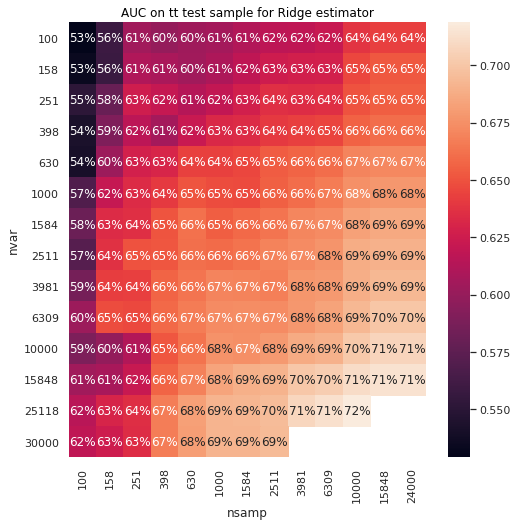

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
piv_ridge = df_ridge[['nvar', 'nsamp', 'score']].pivot('nvar', 'nsamp', 'score')
ax = sns.heatmap(piv_ridge, annot=True, fmt='.0%')
ax.set_title(f'AUC on {collision_type} test sample for Ridge estimator')
fig.savefig(out_path + 'ridge_heatmap.png', format='png')

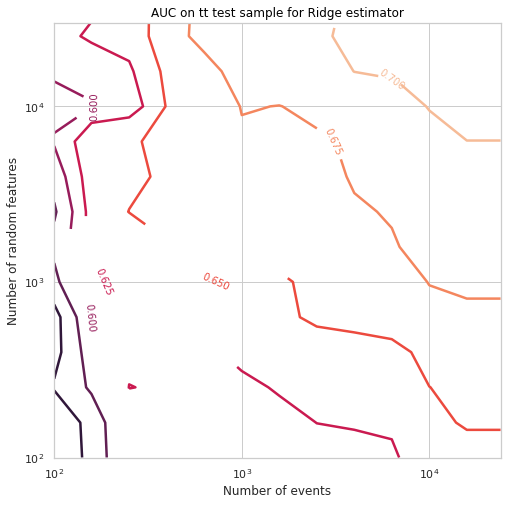

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cs = ax.contour(df_ridge.nsamp.unique(), df_ridge.nvar.unique(), piv_ridge)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_xlabel('Number of events')
ax.set_xscale('log')
ax.set_ylabel('Number of random features')
ax.set_yscale('log')
ax.set_title(f'AUC on {collision_type} test sample for Ridge estimator')
fig.savefig(out_path + 'ridge_contour.png', format='png')


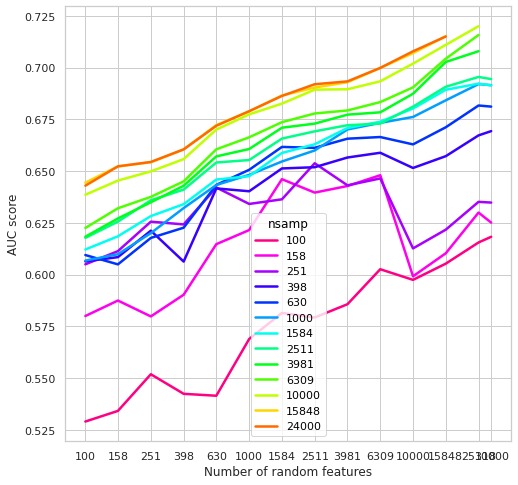

In [74]:
ncol = len(df_best.nsamp.unique())

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.lineplot(data=df_best, x='nvar', y='score', hue='nsamp', 
                 markers=True, legend='full', 
                 palette=sns.color_palette('hsv_r', ncol))

ax.set_xlabel('Number of random features')
ax.set_xscale('log')
ax.set_xticks(df_best.nvar.unique())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylabel('AUC score')
fig.savefig(out_path + 'bestscorevsnumfeatures.png', format='png')
plt.show()